In [ ]:
import numpy as np
import sys
import os

# Add parent directory to path if needed
sys.path.append('/Users/yunyao_1/Dropbox/KcsA/analysis')

from nmr_calculator.config import NMRConfig
from nmr_calculator.xyz_generator import TrajectoryGenerator
from nmr_calculator.euler_converter import EulerConverter
from nmr_calculator.spherical_harmonics import SphericalHarmonicsCalculator
from nmr_calculator.autocorrelation import AutocorrelationCalculator
from nmr_calculator.spectral_density import SpectralDensityCalculator
from nmr_calculator.nmr_parameters import NMRParametersCalculator


In [5]:

config = NMRConfig(
    trajectory_type='vector_on_cone',
    S2=0.85,
    tau_c=2e-9,
    dt=1e-11,
    num_steps=5000,
    interaction_type='CSA',
    delta_sigma=100.0,
    eta=0.0,
    max_lag=2500,
    lag_step=1,
    verbose=True
    )
# Generate trajectory #1 with 
gen = TrajectoryGenerator(config)
rotations, _ = gen.generate()

# # Euler angles
converter = EulerConverter(config)
euler_angles = converter.convert(rotations=rotations)

# # Y₂ₘ
sh_calc = SphericalHarmonicsCalculator(config)
Y2m = sh_calc.calculate(euler_angles)

# Autocorrelation
auto_calc = AutocorrelationCalculator(config)
Co_matrix = auto_calc.compute_correlation_matrix(Y2m)


MODULE 1: Simulating Vector on Cone Surface
  S² = 0.8500
  τc = 2.00 ns
  dt = 10.00 ps
  Steps = 5000
  Cone axis = [0 0 1]
  Cone angle θ = 18.43°

  ✓ Generated 5000 unit vectors
  ✓ All vectors at fixed angle θ = 18.43° from axis
  ✓ Converted 5000 vectors to rotation matrices

MODULE 2: Converting to Euler Angles
  Local axis definition: CO_CA
  Shape: (5000, 3)
  Convention: ZYZ (alpha, beta, gamma)
  Angular ranges:
    α: -176.4° to 178.1°
    β: 18.4° to 18.4°
    γ: -178.1° to 176.4°
Using NumPy-optimized Wigner d-matrix calculation

MODULE 3: Calculating Spherical Harmonics
  Interaction type: CSA
  CSA Parameters:
    δ_iso: 0.00 ppm
    Δδ (anisotropy): 100.00 ppm
    η (asymmetry): 0.000
  Converted to tensor components:
    δ_xx: -50.00 ppm
    δ_yy: -50.00 ppm
    δ_zz: 100.00 ppm
  Using NumPy-optimized calculation

  Y₂ₘ statistics (full Wigner D-matrix calculation):
    Y₂^-2: mean=4.645, std=2.286
    Y₂^-1: mean=31.176, std=12.999
    Y₂^+0: mean=104.103, std=0.0

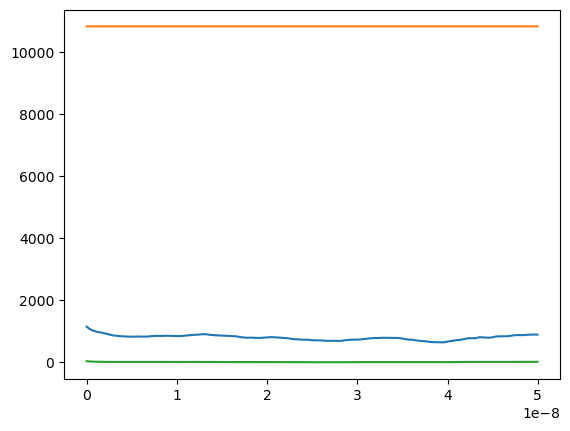

In [12]:
# plot correlation matrix
import matplotlib.pyplot as plt
time = np.arange(config.num_steps/2) * config.dt*2
plt.plot(time, Co_matrix[(-1,-1)])
plt.plot(time, Co_matrix[(0,0)])
plt.plot(time, Co_matrix[(2,2)])

In [13]:
# Example: Generate trajectory with custom cone axis
from scipy.spatial.transform import Rotation as R

config_2 = NMRConfig(
    trajectory_type='vector_on_cone',
    S2=0.85,
    tau_c=2e-9,
    dt=1e-11,
    num_steps=5000,
    interaction_type='CSA',
    delta_sigma=100.0,
    eta=0.0,
    max_lag=2500,
    lag_step=1,
    verbose=True
)

gen = TrajectoryGenerator(config_2)

# Option 1: Use default axis [0, 0, 1]
# rotations, _ = gen.generate()

# Option 2: Specify custom axis directly when calling simulate_vector_on_cone
custom_axis = np.array([1, 0, 0])  # X-axis as cone axis
vectors = gen.simulate_vector_on_cone(axis=custom_axis)

rotations_2 = []
reference_vector = np.array([0, 0, 1])  # z-axis

for vec in vectors:
    # Normalize vector
    vec_norm = vec / np.linalg.norm(vec)
    
    # Create rotation that aligns current vector to reference vector
    # Using the Rodriguez rotation formula implemented in scipy
    rot_matrix = gen._rotation_matrix_from_vectors(vec_norm,reference_vector)
    rotation = R.from_matrix(rot_matrix)
    rotations_2.append(rotation)

converter_2 = EulerConverter(config_2)
euler_angles_2 = converter_2.convert(rotations=rotations_2)

# # Y₂ₘ
sh_calc_2 = SphericalHarmonicsCalculator(config_2)
Y2m_2 = sh_calc_2.calculate(euler_angles_2)

# Autocorrelation
auto_calc = AutocorrelationCalculator(config_2)
Co_matrix_2 = auto_calc.compute_correlation_matrix(Y2m_2)



MODULE 1: Simulating Vector on Cone Surface
  S² = 0.8500
  τc = 2.00 ns
  dt = 10.00 ps
  Steps = 5000
  Cone axis = [1 0 0]
  Cone angle θ = 18.43°

  ✓ Generated 5000 unit vectors
  ✓ All vectors at fixed angle θ = 18.43° from axis

MODULE 2: Converting to Euler Angles
  Local axis definition: CO_CA
  Shape: (5000, 3)
  Convention: ZYZ (alpha, beta, gamma)
  Angular ranges:
    α: -180.0° to 180.0°
    β: 72.0° to 108.4°
    γ: -180.0° to 180.0°
Using NumPy-optimized Wigner d-matrix calculation

MODULE 3: Calculating Spherical Harmonics
  Interaction type: CSA
  CSA Parameters:
    δ_iso: 0.00 ppm
    Δδ (anisotropy): 100.00 ppm
    η (asymmetry): 0.000
  Converted to tensor components:
    δ_xx: -50.00 ppm
    δ_yy: -50.00 ppm
    δ_zz: 100.00 ppm
  Using NumPy-optimized calculation

  Y₂ₘ statistics (full Wigner D-matrix calculation):
    Y₂^-2: mean=63.799, std=2.637
    Y₂^-1: mean=28.953, std=13.696
    Y₂^+0: mean=51.930, std=6.459
    Y₂^+1: mean=28.953, std=13.696
    Y₂^+2

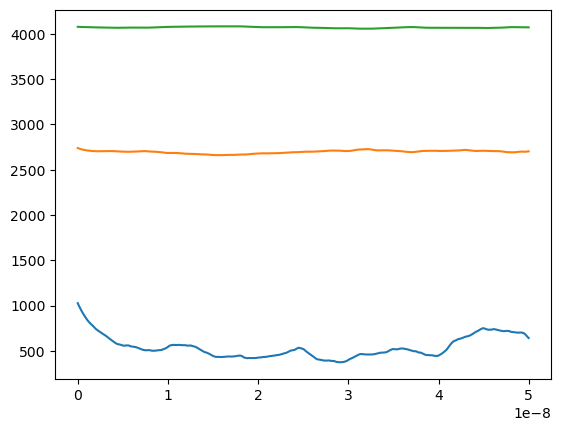

In [14]:
# plot correlation matrix
import matplotlib.pyplot as plt

time = np.arange(config.num_steps/2) * config.dt*2
plt.plot(time, Co_matrix_2[(-1,-1)])
plt.plot(time, Co_matrix_2[(0,0)])
plt.plot(time, Co_matrix_2[(2,2)])

In [15]:
# get the rotatio matrix and eular angles from 0,0, 1 to custom axis 1,0,0
reference_vector = np.array([0, 0, 1])  # z-axis
custom_axis = np.array([1, 0, 0])  # x-axis

rot_matrix = gen._rotation_matrix_from_vectors(reference_vector, custom_axis)#
rotation = R.from_matrix(rot_matrix)
euler_angles_custom = rotation.as_euler('ZYZ', degrees=False)
print("Euler angles to rotate z-axis to x-axis:", euler_angles_custom)

Euler angles to rotate z-axis to x-axis: [0.         1.57079633 0.        ]


In [19]:
# get the rotated correlation matrix
from nmr_calculator.rotation_matrix import WignerDCalculator
from nmr_calculator.rotated_correlation import RotatedCorrelationCalculator
#compute_wigner_d_from_euler, rotate_correlation_matrix
# wigner_calc = WignerDCalculator(config)
# wigner_d = wigner_calc.calculate_wigner_d_matrices(euler_angles)

rotated_correlation_matrix = RotatedCorrelationCalculator(config)
wigner_d = rotated_correlation_matrix.compute_wigner_d_from_euler(euler_angles_custom.reshape(1,3))
rotated_correlation_matrix = rotated_correlation_matrix.rotate_correlation_matrix(Co_matrix, save_individual=False,save_dir=None)



  Computing Wigner D-matrices from Euler angles
    Number of orientations: 1

MODULE 5: Calculating Wigner-D Rotation Matrices
  Rank: 2 (for NMR interactions)
  Matrix size: 5×5 (m = -2, -1, 0, 1, 2)

  ✓ Calculated 1 Wigner-D matrices
  ✓ Computed Wigner D-matrices
    Shape: (1, 5, 5)

MODULE 5: Rotating Correlation Matrices
  Number of orientations: 1
  Correlation matrix size: 5×5
  Number of lag points: 2500
  Rotating using optimized numba implementation...
  ✓ Rotated correlations computed
    Output shape: (1, 5, 5, 2500)


/Users/yunyao_1/miniforge3/envs/kcsa_torsion/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/yunyao_1/miniforge3/envs/kcsa_torsion/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/yunyao_1/miniforge3/envs/kcsa_torsion/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


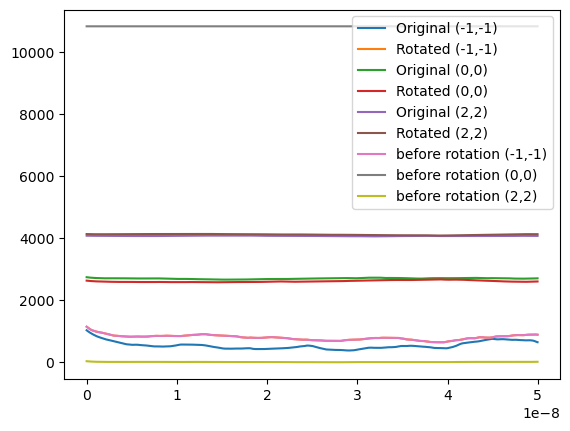

In [23]:
# plot correlation matrix 2 and rotated correlation matrix
import matplotlib.pyplot as plt
time = np.arange(config.num_steps/2) * config.dt*2
plt.plot(time, Co_matrix_2[(-1,-1)], label='Original (-1,-1)')
plt.plot(time, rotated_correlation_matrix[0,1,1,:], label='Rotated (-1,-1)')
plt.plot(time, Co_matrix_2[(0,0)], label='Original (0,0)')
plt.plot(time, rotated_correlation_matrix[0,2,2,:], label='Rotated (0,0)')
plt.plot(time, Co_matrix_2[(2,2)], label='Original (2,2)')
plt.plot(time, rotated_correlation_matrix[0,4,4,:], label='Rotated (2,2)')
# add the before rotated one
plt.plot(time, Co_matrix[(-1,-1)], label='before rotation (-1,-1)')
plt.plot(time, Co_matrix[(0,0)], label='before rotation (0,0)')
plt.plot(time, Co_matrix[(2,2)], label='before rotation (2,2)')
plt.legend()
plt.show()      